# Citation

Samaneh Mahdavifar, Amgad Hanafy Salem, Princy Victor, Miguel Garzon, Amir H. Razavi, Natasha Hellberg, Arash Habibi Lashkari, “Lightweight Hybrid Detection of Data Exfiltration using DNS based on Machine Learning”, The 11th IEEE International Conference on Communication and Network Security (ICCNS), Dec. 3-5, 2021, Beijing Jiaotong University, Weihai, China.

In [2]:
import re
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Load stateless DNS data

Load each csv file into a corresponding dataframe*

* Stateless data has 3 benign csv files that will be concatenated into a single dataframe

## 1.1. Load heavy stateless data

In [6]:
stateless_heavy_audio = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_audio.pcap.csv")
stateless_heavy_audio['Category'] = "Audio"
stateless_heavy_compressed = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_compressed.pcap.csv")
stateless_heavy_compressed['Category'] = "Compressed"
stateless_heavy_exe = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_exe.pcap.csv")
stateless_heavy_exe['Category'] = "Exe"
stateless_heavy_image = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_image.pcap.csv")
stateless_heavy_image['Category'] = "Image"
stateless_heavy_text = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_text.pcap.csv")
stateless_heavy_text['Category'] = "Text"
stateless_heavy_video = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateless_features-heavy_video.pcap.csv")
stateless_heavy_video['Category'] = "Video"

stateless_heavy_benign = '../../../datasets/CICBELLEXFDNS2021/Heavy/Benign/'

# Use regex to get stateless benign data only
stateless_heavy_benign_list = [f"{stateless_heavy_benign}{f}" for f in listdir(stateless_heavy_benign) if isfile(join(stateless_heavy_benign, f)) and re.search("^stateful", f) == None]

stateless_heavy_benign_df = pd.concat(map(pd.read_csv, stateless_heavy_benign_list), ignore_index=True)
stateless_heavy_benign_df['Category'] = "Benign"
stateless_heavy_benign_df['Class'] = "Benign"

In [7]:
stateless_heavy_malicious = pd.concat(
    [
        stateless_heavy_audio,
        stateless_heavy_compressed,
        stateless_heavy_exe,
        stateless_heavy_image,
        stateless_heavy_text,
        stateless_heavy_video,
    ],
    axis=0,
    ignore_index=True
)

stateless_heavy_malicious['Class'] = 'Malicious'

In [8]:
stateless_heavy_data = pd.concat(
    [
        stateless_heavy_malicious,
        stateless_heavy_benign_df
    ],
    axis=0,
    ignore_index=True
)

stateless_heavy_data = stateless_heavy_data.sample(frac=1).reset_index(drop=True)

In [9]:
stateless_heavy_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Category,Class
0,2020-11-24 15:03:04.608667,16,0,0,15,0,2.821115,1,2,13,7.500000,lia,svarosbroliai,14,0,Benign,Benign
1,2020-11-23 15:35:13.897313,15,3,0,12,0,2.889975,3,3,8,4.333333,ufc,ufc-time,12,1,Benign,Benign
2,2020-11-24 15:31:18.694221,10,0,0,9,0,2.406304,1,2,6,4.500000,medi,medigy,7,0,Benign,Benign
3,2020-11-23 19:26:42.029379,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Image,Malicious
4,2020-11-24 08:14:29.730788,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,Text,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433359,2020-11-23 19:48:31.417836,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,Image,Malicious
433360,2020-11-24 01:00:12.177564,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Text,Malicious
433361,2020-11-24 13:22:42.443062,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,Benign,Benign
433362,2020-11-22 11:36:44.238945,16,0,0,15,0,2.954252,1,2,12,7.500000,crypt,localcryptos,13,0,Benign,Benign


## 1.2. Load light stateless data

In [10]:
stateless_light_audio = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_audio.pcap.csv")
stateless_light_audio['Category'] = "Audio"
stateless_light_compressed = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_compressed.pcap.csv")
stateless_light_compressed['Category'] = "Compressed"
stateless_light_exe = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_exe.pcap.csv")
stateless_light_exe['Category'] = "Exe"
stateless_light_image = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_image.pcap.csv")
stateless_light_image['Category'] = "Image"
stateless_light_text = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_text.pcap.csv")
stateless_light_text['Category'] = "Text"
stateless_light_video = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateless_features-light_video.pcap.csv")
stateless_light_video['Category'] = "Video"

stateless_light_benign = '../../../datasets/CICBELLEXFDNS2021/Light/Benign/'

# Use regex to get stateless benign data only
stateless_light_benign_list = [f"{stateless_light_benign}{f}" for f in listdir(stateless_light_benign) if isfile(join(stateless_light_benign, f)) and re.search("^stateful", f) == None]

stateless_light_benign_df = pd.concat(map(pd.read_csv, stateless_light_benign_list), ignore_index=True)
stateless_light_benign_df['Category'] = "Benign"
stateless_light_benign_df['Class'] = "Benign"

In [13]:
stateless_light_malicious = pd.concat(
    [
        stateless_light_audio,
        stateless_light_compressed,
        stateless_light_exe,
        stateless_light_image,
        stateless_light_text,
        stateless_light_video,
    ],
    axis=0,
    ignore_index=True
)

stateless_light_malicious['Class'] = 'Malicious'

In [14]:
stateless_light_data = pd.concat(
    [
        stateless_light_malicious,
        stateless_light_benign_df
    ],
    axis=0,
    ignore_index=True
)

stateless_light_data = stateless_light_data.sample(frac=1).reset_index(drop=True)

In [15]:
stateless_light_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Category,Class
0,2020-11-21 23:54:25.984371,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Exe,Malicious
1,2020-11-21 19:34:45.280660,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,Audio,Malicious
2,2020-11-21 16:59:51.390689,12,3,0,10,0,2.289390,2,3,5,3.333333,not,notia,9,1,Benign,Benign
3,2020-11-21 22:50:58.003111,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Compressed,Malicious
4,2020-11-21 20:02:31.641931,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Audio,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102769,2020-11-21 23:20:26.332721,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,Compressed,Malicious
102770,2020-11-21 16:44:01.111935,17,0,0,16,0,3.052909,1,2,13,8.000000,girls,xxxtgirlstube,14,0,Benign,Benign
102771,2020-11-21 17:39:17.006920,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,Benign,Benign
102772,2020-11-22 03:19:50.759642,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,Video,Malicious


## 1.3. Combine light and heavy stateless data

In [17]:
stateless_data = pd.concat(
    [
        stateless_heavy_data,
        stateless_light_data
    ],
    axis=0,
    ignore_index=True
)

stateless_data = stateless_data.sample(frac=1).reset_index(drop=True)

In [18]:
stateless_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Category,Class
0,2020-11-22 18:25:18.081236,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,Audio,Malicious
1,2020-11-23 01:54:05.338032,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Compressed,Malicious
2,2020-11-23 16:09:22.604281,18,0,0,17,0,3.246431,1,2,14,8.500000,directory,wpgeodirectory,15,0,Benign,Benign
3,2020-11-24 18:18:02.763801,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Video,Malicious
4,2020-11-23 17:28:23.495666,13,0,0,12,0,2.589735,1,2,9,6.000000,opel,locopelis,10,0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,2020-11-22 11:29:23.066324,22,3,0,20,0,2.965497,2,3,14,6.666667,services,speedyservices,18,1,Benign,Benign
536134,2020-11-21 15:30:23.109594,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,Benign,Benign
536135,2020-11-22 16:16:28.021776,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Audio,Malicious
536136,2020-11-24 13:50:32.508061,13,0,0,12,0,2.989735,1,2,9,6.000000,humble,humbleisd,10,0,Benign,Benign


# 2. Exploratory Data Analysis (EDA)

In [19]:
stateless_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Category,Class
0,2020-11-22 18:25:18.081236,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,Audio,Malicious
1,2020-11-23 01:54:05.338032,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Compressed,Malicious
2,2020-11-23 16:09:22.604281,18,0,0,17,0,3.246431,1,2,14,8.500000,directory,wpgeodirectory,15,0,Benign,Benign
3,2020-11-24 18:18:02.763801,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,Video,Malicious
4,2020-11-23 17:28:23.495666,13,0,0,12,0,2.589735,1,2,9,6.000000,opel,locopelis,10,0,Benign,Benign


In [20]:
stateless_data.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain', 'Category',
       'Class'],
      dtype='object')

In [21]:
stateless_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Category          536138 non-null  object 
 16  Class             53

Show unique DNS exfiltration categories and their respective counts

In [22]:
stateless_data['Category'].value_counts()

Category
Benign        241785
Text           74581
Audio          53413
Compressed     45987
Video          42383
Exe            41079
Image          36910
Name: count, dtype: int64

Show unique DNS exfiltration classes and their respective counts

In [23]:
stateless_data['Class'].value_counts()

Class
Malicious    294353
Benign       241785
Name: count, dtype: int64

Check for NaN values

In [24]:
stateless_data.isna().any()

timestamp           False
FQDN_count          False
subdomain_length    False
upper               False
lower               False
numeric             False
entropy             False
special             False
labels              False
labels_max          False
labels_average      False
longest_word         True
sld                 False
len                 False
subdomain           False
Category            False
Class               False
dtype: bool

Show NaN value counts for each column

In [25]:
stateless_data.isna().sum()

timestamp            0
FQDN_count           0
subdomain_length     0
upper                0
lower                0
numeric              0
entropy              0
special              0
labels               0
labels_max           0
labels_average       0
longest_word        14
sld                  0
len                  0
subdomain            0
Category             0
Class                0
dtype: int64

In [26]:
stateless_data[stateless_data['longest_word'].isna()]

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Category,Class
14988,2020-11-21 16:55:23.255911,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,Benign,Benign
101237,2020-11-22 13:29:00.097524,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,Benign,Benign
133385,2020-11-23 17:43:35.134209,12,0,0,10,0,1.714247,2,2,9,5.500000,NaN,nanu-nana,10,0,Benign,Benign
135928,2020-11-21 16:55:23.213426,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,Benign,Benign
172007,2020-11-24 16:09:36.680115,11,0,0,10,0,2.125000,1,2,7,5.000000,NaN,nullphp,8,0,Benign,Benign
227447,2020-11-22 13:29:00.050485,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,Benign,Benign
240791,2020-11-21 16:16:29.228023,13,3,0,11,0,2.067168,2,3,5,3.666667,NaN,nanit,9,1,Benign,Benign
254757,2020-11-23 17:43:35.357937,16,3,0,13,0,2.068885,3,3,9,4.666667,NaN,nanu-nana,13,1,Benign,Benign
286909,2020-11-23 17:43:35.075802,12,0,0,10,0,1.714247,2,2,9,5.500000,NaN,nanu-nana,10,0,Benign,Benign
299994,2020-11-21 16:16:29.036661,9,0,0,8,0,1.820802,1,2,5,4.000000,NaN,nanit,6,0,Benign,Benign


Drop rows with NaN values

In [27]:
stateless_data = stateless_data.dropna()

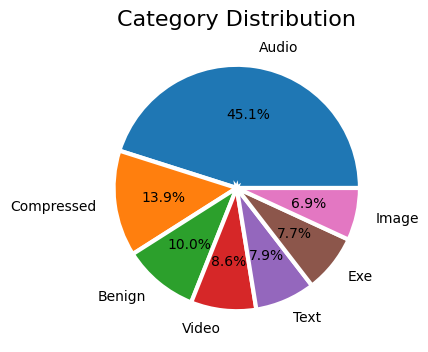

In [28]:
labels = stateless_data['Category'].unique()
values = stateless_data['Category'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.title("Category Distribution", size=16)
plt.show()

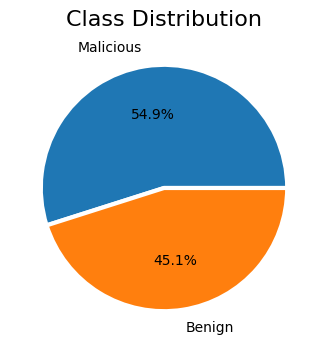

In [29]:
labels = stateless_data['Class'].unique()
values = stateless_data['Class'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.title("Class Distribution", size=16)
plt.show()

# 3. Data preparation

1. Separate features from labels
2. Remove timestamps to prevent ML overfitting
3. Use target encoding for categorical columns
4. Encode labels
5. (Optional) Normalize data using [StandardScaler](https://www.geeksforgeeks.org/machine-learning/what-is-standardization-in-machine-learning/)

## 3.1. Separate features from labels

In [30]:
X_stateless_data = stateless_data.drop(['Class'], axis=1)
y_stateless_data = stateless_data['Class']

## 3.2. Remove timestamps to prevent ML overfiting

In [32]:
X_stateless_data.drop(['timestamp', 'Category'], axis=1, inplace=True)

In [33]:
X_stateless_data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1
2,18,0,0,17,0,3.246431,1,2,14,8.500000,directory,wpgeodirectory,15,0
3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1
4,13,0,0,12,0,2.589735,1,2,9,6.000000,opel,locopelis,10,0


## 3.3. Target encoding categorical columns

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder

Check unique value count in categorical columns in feature data

In [35]:
categorical_columns = X_stateless_data.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Column: {column}, unique values: {len(stateless_data[column].unique())}")

Column: longest_word, unique values: 12274
Column: sld, unique values: 32216


Target encode categorical columns

In [36]:
encoder = TargetEncoder(
    categories='auto',
    target_type='binary',  # Categorize between Benign and Malicious
    smooth='auto',
    cv=5,
    random_state=42
)

In [37]:
categorical_columns = X_stateless_data.select_dtypes(include='object').columns
categorical_columns

Index(['longest_word', 'sld'], dtype='object')

In [38]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_stateless_data, y_stateless_data, test_size=0.2, random_state=42)

In [39]:
%%time

X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns], y_train)

CPU times: user 1.54 s, sys: 11.8 ms, total: 1.55 s
Wall time: 1.59 s


In [40]:
%%time

X_test[categorical_columns] = encoder.transform(X_test[categorical_columns])

CPU times: user 318 ms, sys: 45 μs, total: 318 ms
Wall time: 322 ms


## 3.4. Encode labels

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [43]:
X_train.shape, y_train.shape

((428899, 14), (428899,))

In [44]:
X_test.shape, y_test.shape

((107225, 14), (107225,))

## 3.5. Normalize data

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
%%time

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

CPU times: user 116 ms, sys: 20.7 ms, total: 136 ms
Wall time: 142 ms


# 4. Model training

XGBoost will be trained and tested on heavy stateless data

## 4.1. Training

In [47]:
%%time

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

CPU times: user 9.77 s, sys: 130 ms, total: 9.9 s
Wall time: 1.55 s


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## 4.2. Testing

In [48]:
%%time

y_pred = model.predict(X_test)

CPU times: user 509 ms, sys: 3.94 ms, total: 513 ms
Wall time: 121 ms


In [49]:
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_squared_error, mean_absolute_error, precision_score, confusion_matrix, multilabel_confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [53]:
results_dict = {}

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["XGB_stateless"] = results

pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
XGB_stateless,0.820704,0.86481,0.811091,0.820704,0.179296,0.179296,0.423433


# 5. Hyperparameter tuning

Hyperparameter tuning using optuna

In [51]:
pass

# 6. Save model

In [52]:
import pickle

In [54]:
dir = '../../../models/CICBELLEXFDNS2021/stateless/'

with open(f'{dir}XGB_stateless.pkl', 'wb') as f:
    pickle.dump(model, f)